In [35]:
import numpy as np
import matplotlib.pyplot as plt     #importing e v e r y t h i n g
import seaborn as sns
sns.set(color_codes=True)
import csv
import math
import random
import pandas as pd
import sklearn.metrics as met
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
import re

In [88]:
POSTS_PER_SIGN = 20000         #constants
zods = ['Leo','Aquarius','Aries','Capricorn','Gemini','Cancer','Sagittarius','Scorpio','Libra','Virgo','Taurus','Pisces']
WORD_LIMIT = 120
APPEARENCE_MINIMUM = 10000      #originally 20,000 , 120, and 5,000

In [89]:
df = pd.read_csv('../data/blogtext_trimmed.csv')  #read it in a good way
df.head()

,sign,text,clean_text
0,Leo,"Info has been found (+/- 100 pages,...",info has been found pages and mb of pdf files ...
1,Leo,These are the team members: Drewe...,these are the team members drewes van der laag...
2,Leo,In het kader van kernfusie op aarde...,in het kader van kernfusie op aarde maak je ei...
3,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks to yahoo s toolbar i can now capture th...
4,Aquarius,I had an interesting conversation...,i had an interesting conversation with my dad ...


In [90]:
df.dtypes

sign          object
text          object
clean_text    object
dtype: object

<AxesSubplot:>

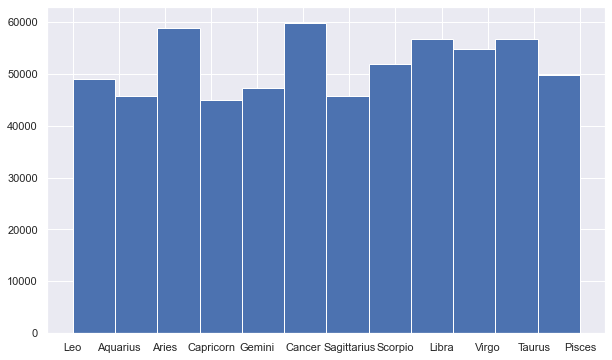

In [91]:
df['sign'].hist(bins=12,figsize=(10,6))

In [92]:
post_counts = dict()
for zodiac in zods:
    post_counts[zodiac] = 0
word_counts = dict()
count = 0
trainInds = dict()

for post in df['clean_text']:
    sign = df['sign'][count]
    if post_counts[sign] < POSTS_PER_SIGN:
        for word in post.split():
            cur = sign + '-' + word
            if cur in word_counts:
                word_counts[cur] += 1
            else:
                word_counts[cur] = 1
        post_counts[sign] += 1
        trainInds[count] = 1
    count += 1
    
trainInds = trainInds.keys()

In [93]:
vocab = dict() #get the vocabulary over the same corpus

for ind in trainInds:
    for word in df['clean_text'][ind].split():
        if not word in vocab:
            vocab[word] = 1
            
vocab = vocab.keys()

In [94]:
word_ratios = dict()
                        #normalize the words over their total usage, and remove ones that are too infrequent
for word in vocab:
    sum = 0
    for sign in zods:
        if (sign + '-' + word) in word_counts:
            sum += word_counts[sign + '-' + word]
    if sum >= APPEARENCE_MINIMUM:
        for sign in zods:
            if (sign + '-' + word) in word_counts:
                word_ratios[sign + '-' + word] = word_counts[sign + '-' + word] / sum
            else:
                word_ratios[sign + '-' + word] = 0
    else:
        for sign in zods:
            word_ratios[sign + '-' + word] = 0

In [95]:
sorted_ratios = sorted(word_ratios.items(), key=lambda x: x[1], reverse=True)  #sort by the most 'informative'

In [96]:
sorted_ratios

[('Libra-pm', 0.21035216260931222),
 ('Taurus-x', 0.1669019347338703),
 ('Cancer-la', 0.14223063889165752),
 ('Taurus-fucking', 0.14094169005300905),
 ('Libra-dont', 0.13955674949630625),
 ('Leo-war', 0.13767433900915546),
 ('Libra-im', 0.13380423234846528),
 ('Pisces-com', 0.13278623126460365),
 ('Libra-haha', 0.131981613248536),
 ('Gemini-n', 0.12774328932412346),
 ('Aquarius-war', 0.12680756395995552),
 ('Cancer-birthday', 0.12475403384494294),
 ('Aquarius-writing', 0.12306425041186161),
 ('Aquarius-american', 0.12296681847755368),
 ('Aquarius-school', 0.12164391421808879),
 ('Leo-american', 0.12129380053908356),
 ('Taurus-fuck', 0.12083369976255387),
 ('Aquarius-class', 0.12069336778639105),
 ('Aquarius-group', 0.11999018485195485),
 ('Aries-com', 0.11990653672992534),
 ('Taurus-okay', 0.11921928482994684),
 ('Leo-o', 0.11832147294702361),
 ('Libra-n', 0.11821281804669057),
 ('Leo-bush', 0.11802051115090346),
 ('Aquarius-book', 0.11801577866637847),
 ('Aquarius-city', 0.11770471353

In [74]:
tally_words = dict()
                        #get the most informative words to be tallied
count = 0

while count < WORD_LIMIT:
    tally_words[sorted_ratios[count][0].split('-')[1]] = 0
    count += 1

In [75]:
tallies = [[] for i in range(POSTS_PER_SIGN * 12)]
count = 0
                    #give a tally of every 'important' word on a per post basis
for ind in trainInds:
    for word in df['clean_text'][ind].split():
        if word in tally_words:
            tally_words[word] += 1
    tallies[count] = list(tally_words.values())
    count += 1
    for key in tally_words.keys():
        tally_words[key] = 0

In [76]:
X = np.array(tallies)
y = np.array(df['sign'][trainInds])

In [77]:
model = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X,y)

C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

In [78]:
trainAcc = met.accuracy_score(y,model.predict(X))
print(trainAcc)

0.12584583333333332


In [79]:
testDF = df.tail(100000)


test_tallies = [[] for i in range(100000)]
count = 0
                    #give a tally of every 'important' word on a per post basis
for post in testDF['clean_text']:
    for word in post.split():
        if word in tally_words:
            tally_words[word] += 1
    test_tallies[count] = list(tally_words.values())
    count += 1
    for key in tally_words.keys():
        tally_words[key] = 0
        
        
testX = np.array(test_tallies)
testY = np.array(testDF['sign'])

In [80]:
testAcc = met.accuracy_score(testY,model.predict(testX))
print(testAcc)

0.08355


In [38]:
print(met.classification_report(y,model.predict(X)))

              precision    recall  f1-score   support

    Aquarius       0.18      0.14      0.16     20000
       Aries       0.13      0.06      0.08     20000
      Cancer       0.12      0.06      0.08     20000
   Capricorn       0.12      0.06      0.08     20000
      Gemini       0.12      0.11      0.11     20000
         Leo       0.15      0.11      0.13     20000
       Libra       0.13      0.12      0.13     20000
      Pisces       0.16      0.15      0.16     20000
 Sagittarius       0.15      0.11      0.13     20000
     Scorpio       0.09      0.34      0.14     20000
      Taurus       0.17      0.15      0.16     20000
       Virgo       0.13      0.10      0.11     20000

    accuracy                           0.13    240000
   macro avg       0.14      0.13      0.12    240000
weighted avg       0.14      0.13      0.12    240000



In [39]:
print(met.classification_report(testY,model.predict(testX)))

              precision    recall  f1-score   support

    Aquarius       0.06      0.07      0.06      5827
       Aries       0.09      0.04      0.06      9270
      Cancer       0.10      0.04      0.06     10529
   Capricorn       0.08      0.04      0.06      7240
      Gemini       0.06      0.08      0.07      6449
         Leo       0.08      0.06      0.07      8503
       Libra       0.13      0.11      0.12     10294
      Pisces       0.07      0.07      0.07      8258
 Sagittarius       0.06      0.07      0.06      4510
     Scorpio       0.09      0.33      0.15      9289
      Taurus       0.09      0.07      0.08      8658
       Virgo       0.12      0.07      0.09     11173

    accuracy                           0.09    100000
   macro avg       0.09      0.09      0.08    100000
weighted avg       0.09      0.09      0.08    100000



In [33]:
1/12

0.08333333333333333

In [36]:
randTrainInds = sorted(trainInds, key = lambda x: random.random())

In [40]:
bootX = X
bootY = np.array(df['sign'][randTrainInds])

bootModel = OneVsOneClassifier(LinearSVC(random_state=0)).fit(bootX,bootY)

bootTestAcc = met.accuracy_score(testY,bootModel.predict(testX))

print(bootTestAcc)

C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

0.07878


In [ ]:
bootAccs = []

In [50]:
count = 0

while count < 400:
    randTrainInds = sorted(trainInds, key = lambda x: random.random())
    bootX = X
    bootY = np.array(df['sign'][randTrainInds])

    bootModel = OneVsOneClassifier(LinearSVC(random_state=0)).fit(bootX,bootY)

    bootTestAcc = met.accuracy_score(testY,bootModel.predict(testX))

    count += 1
    print(bootTestAcc)
    bootAccs.append(bootTestAcc)

C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

0.07507


C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

0.074


C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

0.08018


C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

KeyboardInterrupt: 

In [47]:
print(bootAccs)

[0.0855, 0.07617, 0.09102, 0.08815, 0.08645, 0.07632, 0.08688, 0.08178, 0.09023, 0.08352, 0.09021, 0.07814, 0.08787, 0.08416, 0.08519, 0.0893, 0.09197, 0.0865, 0.08473, 0.08781, 0.08807, 0.08588, 0.07336, 0.07962, 0.07434, 0.07712, 0.07562, 0.07996, 0.09222, 0.08466, 0.08886, 0.08339, 0.08284, 0.08746, 0.09163, 0.09025, 0.06894, 0.08642, 0.07944, 0.09168, 0.08266, 0.0757, 0.08358, 0.07671, 0.09282, 0.08858, 0.07235, 0.09031, 0.08726, 0.09117, 0.07064, 0.08538, 0.09264, 0.09068, 0.07189, 0.08407, 0.07723, 0.07223, 0.09113, 0.07776, 0.09232, 0.09144, 0.08574, 0.07722, 0.08695, 0.08745, 0.09247, 0.09126, 0.09019, 0.07371, 0.09105, 0.08583, 0.07744, 0.07829, 0.09174, 0.08857, 0.08323, 0.09137, 0.08944, 0.08832, 0.08629, 0.07921, 0.08687, 0.08837, 0.0905, 0.0961, 0.06948, 0.08583, 0.07332, 0.08658, 0.09235, 0.08592, 0.09349, 0.08688, 0.08219, 0.08128, 0.08839, 0.07838, 0.08436, 0.08749, 0.08244, 0.06846, 0.0919, 0.08765, 0.08078, 0.07446, 0.09049, 0.07869, 0.08999, 0.09298, 0.09171, 0.07314

In [48]:
len(bootAccs)

311

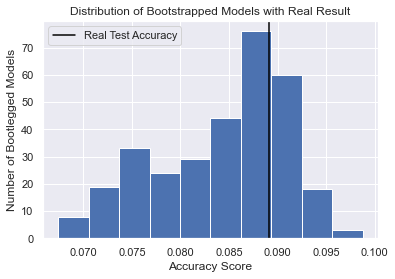

In [63]:
plt.figure(figsize=(6,4))
plt.hist(bootAccs)
plt.axvline(testAcc,color='black',label='Real Test Accuracy')
plt.xlabel('Accuracy Score')
plt.ylabel('Number of Bootlegged Models')
plt.title('Distribution of Bootstrapped Models with Real Result')
plt.legend()

In [54]:
testAcc

0.08908